In [16]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import random

In [17]:
np.random.seed(0)

In [18]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape[0])

(60000, 28, 28)
(10000, 28, 28)
60000


In [20]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels"
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"

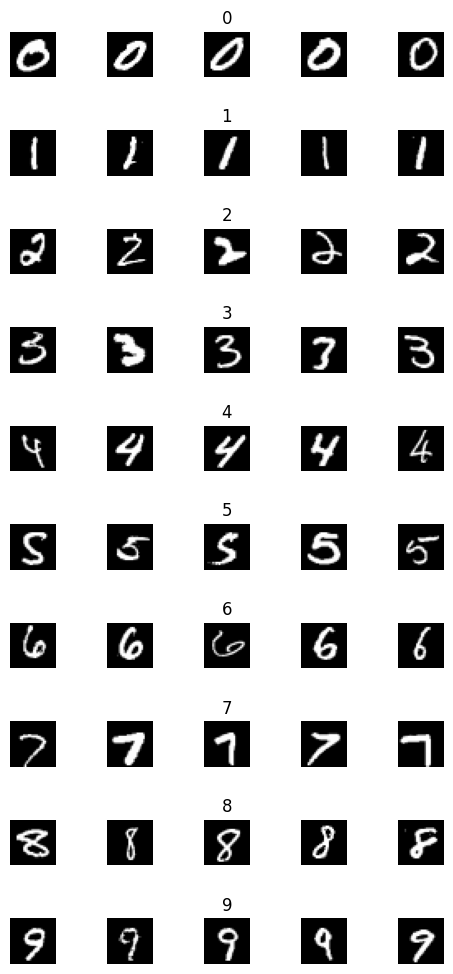

In [21]:
num_of_samples = []

cols = 5
num_of_classes = 10

fig, axs = plt.subplots(nrows = num_of_classes, ncols = cols, figsize = (5, 10))
fig.tight_layout()

for i in range(cols):
  for j in range(num_of_classes):
    x_selected = X_train[y_train == j]
    axs[j][i].imshow(x_selected[random.randint(0, len(x_selected- 1)), :, :], cmap = plt.get_cmap("gray"))
    axs[j][i].axis("off")
    if i == 2:
      axs[j][i].set_title(str(j))
      num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of Images')

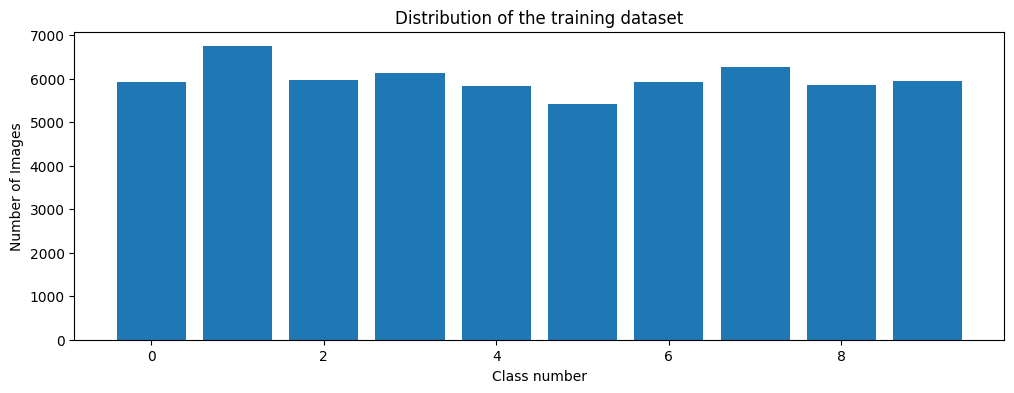

In [22]:
print(num_of_samples)
plt.figure(figsize = (12, 4))
plt.bar(range(0, num_of_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of Images")

In [23]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [24]:
X_train = X_train/255
X_test = X_test/255

In [25]:
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)

In [26]:
def create_model():
  model = Sequential()
  model.add(Dense(10, input_dim = num_pixels, activation = "relu"))
  model.add(Dense(10, activation = "relu"))
  model.add(Dense(num_of_classes, activation = "softmax"))
  model.compile(Adam(learning_rate = 0.01), loss = "categorical_crossentropy", metrics = ["accuracy"])
  return model

In [27]:
model = create_model()
print(model.summary())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 10)                  │           7,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             110 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,070 (31.52 KB)

 Trainable params: 8,070 (31.52 KB)

 Non-trainable params: 0 (0.00 B)

None


In [28]:
history = model.fit(X_train, y_train, validation_split = 0.1, epochs = 10, batch_size = 200, verbose = 1, shuffle = 1)

Epoch 1/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7573 - loss: 0.7724 - val_accuracy: 0.9205 - val_loss: 0.2641
Epoch 2/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9128 - loss: 0.3056 - val_accuracy: 0.9295 - val_loss: 0.2383
Epoch 3/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9220 - loss: 0.2702 - val_accuracy: 0.9380 - val_loss: 0.2077
Epoch 4/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9266 - loss: 0.2524 - val_accuracy: 0.9325 - val_loss: 0.2162
Epoch 5/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9278 - loss: 0.2464 - val_accuracy: 0.9438 - val_loss: 0.1977
Epoch 6/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9347 - loss: 0.2276 - val_accuracy: 0.9462 - val_loss: 0.1903
Epoch 7/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9371 - loss: 0.2164 - val_accuracy: 0.9442 - val_loss: 0.2011
Epoch 8/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9361 - loss: 0.2134 - val_accuracy: 0.

Text(0.5, 0, 'Epoch')

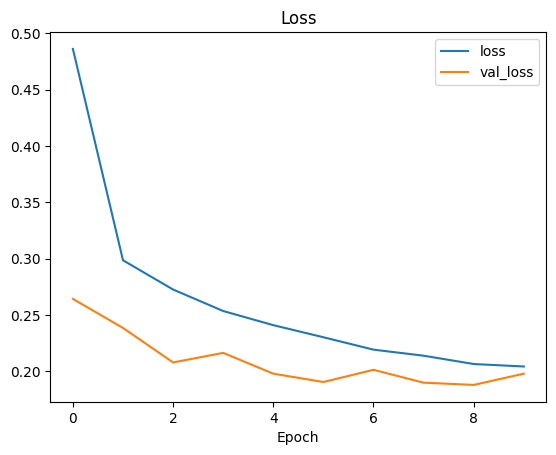

In [29]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["loss", "val_loss"])
plt.title("Loss")
plt.xlabel("Epoch")

Text(0.5, 0, 'Epoch')

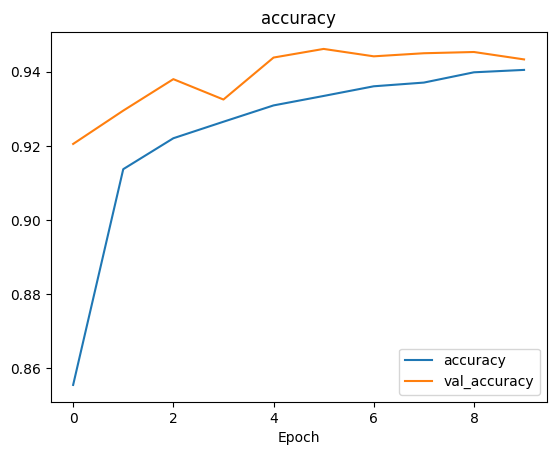

In [30]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.legend(["accuracy", "val_accuracy"])
plt.title("accuracy")
plt.xlabel("Epoch")

In [32]:
score = model.evaluate(X_test, y_test, verbose = 0)
print(type(score))
print("Test score: ", score[0])
print("Test accuracy: ", score[1])

<class 'list'>
Test score:  0.22646895051002502
Test accuracy:  0.9348999857902527


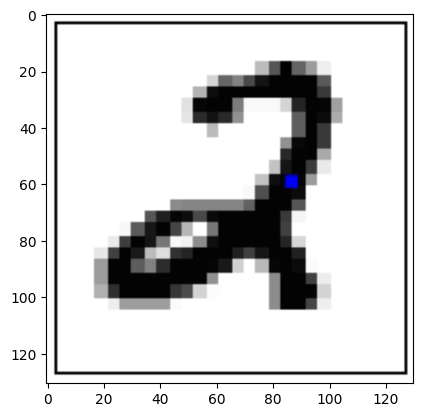

In [36]:
import requests
from PIL import Image
url = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'
response = requests.get(url, stream = True)
img = Image.open(response.raw)
plt.imshow(img)

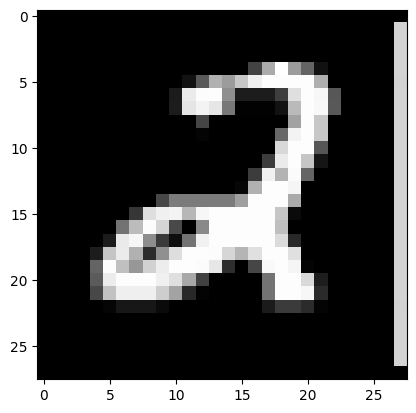

In [41]:
import cv2

img_array = np.asarray(img)
resized = cv2.resize(img_array, (28, 28))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray_scale)
plt.imshow(image, cmap = plt.get_cmap("gray"))

In [42]:
image = image/255
image = image.reshape(1, 784)

In [44]:
prediction = np.argmax(model.predict(image))
print("Predicted Digit: ", str(prediction))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Predicted Digit:  2
